In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset
telecom_churn_full = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_churn_full.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [4]:
# dimensions
print("Dimensions: ", telecom_churn_full.shape, "\n")

Dimensions:  (99999, 226) 



In [5]:
telecom_churn_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking for any missing/NULL values

telecom_churn_full.isnull().values.any()

True

In [7]:
telecom_churn_full["total_rech_amt_7"].isnull().values.any()

False

In [8]:
telecom_churn_full["total_rech_amt_6"].isnull().values.any()

False

In [9]:
# Imputing zeros in place of nulls
telecom_churn_full["total_rech_data_6"] = telecom_churn_full["total_rech_data_6"].fillna(0)
telecom_churn_full["av_rech_amt_data_6"] = telecom_churn_full["av_rech_amt_data_6"].fillna(0)
telecom_churn_full["total_rech_data_7"] = telecom_churn_full["total_rech_data_7"].fillna(0)
telecom_churn_full["av_rech_amt_data_7"] = telecom_churn_full["av_rech_amt_data_7"].fillna(0)

In [10]:
# creating new attribute
telecom_churn_full["total_data_topup_rech_amt_6"] = (telecom_churn_full["total_rech_amt_6"] + (telecom_churn_full["total_rech_data_6"] * telecom_churn_full["av_rech_amt_data_6"]))

In [11]:
telecom_churn_full["total_data_topup_rech_amt_6"].isnull().values.any()
#telecom_churn_full["total_data_topup_rech_amt_6"].head()

False

In [12]:
# creating new attribute
telecom_churn_full["total_data_topup_rech_amt_7"] = (telecom_churn_full["total_rech_amt_7"] + (telecom_churn_full["total_rech_data_7"] * telecom_churn_full["av_rech_amt_data_7"]))

In [13]:
telecom_churn_full["total_data_topup_rech_amt_7"].isnull().values.any()
#telecom_churn_full["total_data_topup_rech_amt_7"].head()

False

In [14]:
# average recharge amount in the first two months (the good phase).

telecom_churn_full["avg_data_topup_rech_amt_6_7"] = ((telecom_churn_full["total_data_topup_rech_amt_6"] + telecom_churn_full["total_data_topup_rech_amt_7"]) / 2)

In [15]:
#telecom_churn_full["avg_data_topup_rech_amt_6_7"].describe()
telecom_churn_full["avg_data_topup_rech_amt_6_7"].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_data_topup_rech_amt_6_7, dtype: float64

In [16]:
# To calculate 70th percentile of average recharge amount

high_value_cust_filter = telecom_churn_full["avg_data_topup_rech_amt_6_7"].quantile(0.7) ##70th percentile

In [17]:
high_value_cust_filter

478.0

In [18]:
# high-value customers

telecom_churn_high_value_cust = telecom_churn_full[telecom_churn_full["avg_data_topup_rech_amt_6_7"] >= high_value_cust_filter]

In [19]:
# dimensions

print("Dimensions: ", telecom_churn_high_value_cust.shape, "\n")

Dimensions:  (30001, 229) 



#### First checkpoint is clear as we get 30001 (around 29.9k) rows after filtering the high-value customers

### Checking for nulls

In [20]:
telecom_churn_high_value_cust["total_ic_mou_9"].isnull().values.any()

False

In [21]:
telecom_churn_high_value_cust["total_og_mou_9"].isnull().values.any()

False

In [22]:
telecom_churn_high_value_cust["vol_2g_mb_9"].isnull().values.any()

False

In [23]:
telecom_churn_high_value_cust["vol_3g_mb_9"].isnull().values.any()

False

In [24]:
# Getting churners, Those who have not made any calls (either incoming or outgoing) 
# AND have not used mobile internet even once in the churn phase i.e in 9th month.

telecom_churn_high_value_cust["churners"] =  np.where((telecom_churn_high_value_cust["total_ic_mou_9"] == 0) & (telecom_churn_high_value_cust["total_og_mou_9"] == 0)  & (telecom_churn_high_value_cust["vol_2g_mb_9"] == 0)  & (telecom_churn_high_value_cust["vol_3g_mb_9"] == 0), 1, 0)

In [25]:
telecom_churn_high_value_cust["churners"].describe()

count    30001.000000
mean         0.081364
std          0.273398
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churners, dtype: float64

### Thus total 8.13% high value customers churned.

In [26]:
### Removing all values related to churn phase.

telecom_churn_high_value_cust.shape

(30001, 230)

In [27]:
### RAttributes without columns related to churn phase ie of without 9th month.

cols = [c for c in telecom_churn_high_value_cust.columns if '_9' not in c]
len(cols)

176

In [28]:
telecom_churn_high_value_cust_without_9 = telecom_churn_high_value_cust[cols]

In [29]:
telecom_churn_high_value_cust_without_9.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    ...     fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0    214.816    ...           1.0  968       30.40        0.00      101.20   
7   1349.850    ...           NaN  802       57.74       19.38       18.74   
8    492.223    ...           1.0  315       21.03      910.65      122.16   
21   597.753    ...           NaN  720        0.00        0.00        0.00   
23   193.897    ...           1.0  604       40.45       51.86        0.00   

    sep_vbc_3g  total_data_topup_rech_amt_6  total_data_topup_rech_amt_7  \
0         3.58                        614.0                        504.0   
7         0.00                       1580.0                        790.0   
8         0.00                        437.0                        955.0   
21        0.00                        600.0                        680.0   
23        0.00                          0.0                       1166.0   

    avg_data_topup_rech_amt_6_7  churners  
0                         559.0         1  
7                        1185.0         1  
8                         696.0         0  
21                        640.0         0  
23                        583.0         0  

[5 rows x 176 columns]

In [30]:
telecom_churn_high_value_cust_without_9_no_unique = telecom_churn_high_value_cust_without_9.loc[:,telecom_churn_high_value_cust_without_9.apply(pd.Series.nunique) != 1]

In [31]:
telecom_churn_high_value_cust_without_9_no_unique.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8    ...     \
0          0.00           NaN           NaN          0.00    ...      
7         52.29        453.43        567.16        325.91    ...      
8         35.08         94.66         80.63        136.48    ...      
21        85.14        757.93        896.68        983.39    ...      
23        33.58         85.41         89.36        205.89    ...      

    fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0         1.0  968       30.40        0.00      101.20        3.58   
7         NaN  802       57.74       19.38       18.74        0.00   
8         1.0  315       21.03      910.65      122.16        0.00   
21        NaN  720        0.00        0.00        0.00        0.00   
23        1.0  604       40.45       51.86        0.00        0.00   

    total_data_topup_rech_amt_6  total_data_topup_rech_amt_7  \
0                         614.0                        504.0   
7                        1580.0                        790.0   
8                         437.0                        955.0   
21                        600.0                        680.0   
23                          0.0                       1166.0   

    avg_data_topup_rech_amt_6_7  churners  
0                         559.0         1  
7                        1185.0         1  
8                         696.0         0  
21                        640.0         0  
23                        583.0         0  

[5 rows x 163 columns]

In [32]:
telecom_churn_high_value_cust_without_9_no_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 163 entries, mobile_number to churners
dtypes: float64(130), int32(1), int64(26), object(6)
memory usage: 37.4+ MB


In [33]:
# Checking null values in the prepared dataframe

aa = (100*telecom_churn_high_value_cust_without_9_no_unique.isnull().sum()/telecom_churn_high_value_cust_without_9_no_unique.shape[0]).sort_values(ascending=False)
aa[aa !=0]

max_rech_data_8             46.825106
fb_user_8                   46.825106
count_rech_3g_8             46.825106
arpu_3g_8                   46.825106
arpu_2g_8                   46.825106
night_pck_user_8            46.825106
count_rech_2g_8             46.825106
total_rech_data_8           46.825106
date_of_last_rech_data_8    46.825106
av_rech_amt_data_8          46.825106
count_rech_3g_6             44.148528
arpu_3g_6                   44.148528
date_of_last_rech_data_6    44.148528
arpu_2g_6                   44.148528
max_rech_data_6             44.148528
night_pck_user_6            44.148528
count_rech_2g_6             44.148528
fb_user_6                   44.148528
fb_user_7                   43.145228
arpu_3g_7                   43.145228
arpu_2g_7                   43.145228
night_pck_user_7            43.145228
count_rech_3g_7             43.145228
count_rech_2g_7             43.145228
max_rech_data_7             43.145228
date_of_last_rech_data_7    43.145228
spl_ic_mou_8

In [34]:
# Dropping columns which are insignificant or have higher null values.

telecom_churn_high_value_cust_without_9_no_unique.drop(["max_rech_data_8", "fb_user_8", "count_rech_3g_8", "arpu_3g_8", "arpu_2g_8", "night_pck_user_8", "count_rech_2g_8", "total_rech_data_8", "date_of_last_rech_data_8", 
"av_rech_amt_data_8", "count_rech_3g_6", "arpu_3g_6", "date_of_last_rech_data_6", "arpu_2g_6", "max_rech_data_6", "night_pck_user_6", "count_rech_2g_6", "fb_user_6",
"fb_user_7", "arpu_3g_7", "arpu_2g_7", "night_pck_user_7", "count_rech_3g_7", "count_rech_2g_7", "max_rech_data_7", "date_of_last_rech_data_7"], axis = 1, inplace = True)

In [35]:
telecom_churn_high_value_cust_without_9_no_unique.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8    ...     \
0          0.00           NaN           NaN          0.00    ...      
7         52.29        453.43        567.16        325.91    ...      
8         35.08         94.66         80.63        136.48    ...      
21        85.14        757.93        896.68        983.39    ...      
23        33.58         85.41         89.36        205.89    ...      

    sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0             0  968       30.40        0.00      101.20        3.58   
7             0  802       57.74       19.38       18.74        0.00   
8             0  315       21.03      910.65      122.16        0.00   
21            0  720        0.00        0.00        0.00        0.00   
23            1  604       40.45       51.86        0.00        0.00   

    total_data_topup_rech_amt_6  total_data_topup_rech_amt_7  \
0                         614.0                        504.0   
7                        1580.0                        790.0   
8                         437.0                        955.0   
21                        600.0                        680.0   
23                          0.0                       1166.0   

    avg_data_topup_rech_amt_6_7  churners  
0                         559.0         1  
7                        1185.0         1  
8                         696.0         0  
21                        640.0         0  
23                        583.0         0  

[5 rows x 137 columns]

In [36]:
# checking nulls after dropping columns.

aa = (100*telecom_churn_high_value_cust_without_9_no_unique.isnull().sum()/telecom_churn_high_value_cust_without_9_no_unique.shape[0]).sort_values(ascending=False)
aa[aa !=0]

std_og_t2f_mou_8       3.913203
loc_og_t2t_mou_8       3.913203
loc_ic_t2m_mou_8       3.913203
loc_og_t2f_mou_8       3.913203
loc_og_t2c_mou_8       3.913203
loc_ic_t2f_mou_8       3.913203
std_og_t2t_mou_8       3.913203
loc_ic_mou_8           3.913203
std_og_t2m_mou_8       3.913203
isd_og_mou_8           3.913203
ic_others_8            3.913203
std_ic_t2t_mou_8       3.913203
isd_ic_mou_8           3.913203
spl_ic_mou_8           3.913203
std_og_mou_8           3.913203
std_ic_t2m_mou_8       3.913203
std_ic_mou_8           3.913203
loc_og_t2m_mou_8       3.913203
loc_og_mou_8           3.913203
offnet_mou_8           3.913203
loc_ic_t2t_mou_8       3.913203
og_others_8            3.913203
spl_og_mou_8           3.913203
onnet_mou_8            3.913203
roam_ic_mou_8          3.913203
std_ic_t2f_mou_8       3.913203
roam_og_mou_8          3.913203
date_of_last_rech_8    1.943269
onnet_mou_6            1.816606
offnet_mou_6           1.816606
                         ...   
std_og_t

In [37]:
list = telecom_churn_high_value_cust_without_9_no_unique.columns
#telecom_churn_high_value_cust_without_9_no_unique.columns

In [38]:
#dropping nulls for all columns.

for col_name in list:
    telecom_churn_high_value_cust_without_9_no_unique = telecom_churn_high_value_cust_without_9_no_unique[~pd.isnull(telecom_churn_high_value_cust_without_9_no_unique[col_name])]

round(100*(telecom_churn_high_value_cust_without_9_no_unique.isnull().sum()/len(telecom_churn_high_value_cust_without_9_no_unique.index)), 2)

mobile_number                  0.0
arpu_6                         0.0
arpu_7                         0.0
arpu_8                         0.0
onnet_mou_6                    0.0
onnet_mou_7                    0.0
onnet_mou_8                    0.0
offnet_mou_6                   0.0
offnet_mou_7                   0.0
offnet_mou_8                   0.0
roam_ic_mou_6                  0.0
roam_ic_mou_7                  0.0
roam_ic_mou_8                  0.0
roam_og_mou_6                  0.0
roam_og_mou_7                  0.0
roam_og_mou_8                  0.0
loc_og_t2t_mou_6               0.0
loc_og_t2t_mou_7               0.0
loc_og_t2t_mou_8               0.0
loc_og_t2m_mou_6               0.0
loc_og_t2m_mou_7               0.0
loc_og_t2m_mou_8               0.0
loc_og_t2f_mou_6               0.0
loc_og_t2f_mou_7               0.0
loc_og_t2f_mou_8               0.0
loc_og_t2c_mou_6               0.0
loc_og_t2c_mou_7               0.0
loc_og_t2c_mou_8               0.0
loc_og_mou_6        

In [39]:
# final dataframe

telecom_churn_high_value_cust_without_9_no_unique.shape

(28163, 137)

In [40]:
telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_6'] = pd.to_datetime(telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_6'], dayfirst=True , errors='coerce')
telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_7'] = pd.to_datetime(telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_7'], dayfirst=True , errors='coerce')
telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_8'] = pd.to_datetime(telecom_churn_high_value_cust_without_9_no_unique['date_of_last_rech_8'], dayfirst=True , errors='coerce')

In [41]:
df_churners  = telecom_churn_high_value_cust_without_9_no_unique[telecom_churn_high_value_cust_without_9_no_unique['churners'] == 1]
df_non_churners  = telecom_churn_high_value_cust_without_9_no_unique[telecom_churn_high_value_cust_without_9_no_unique['churners'] == 0]

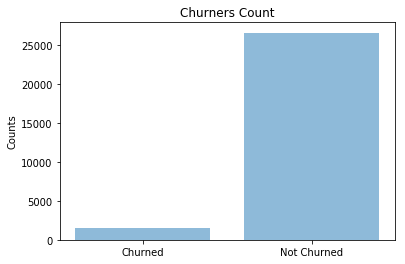

In [42]:
# plotting churners vs non-churners

import matplotlib.pyplot as plt

churners = ('Churned', 'Not Churned')
y_pos = np.arange(len(churners))
count = [df_churners.shape[0], df_non_churners.shape[0]]
 
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, churners)
plt.ylabel('Counts')
plt.title('Churners Count')
 
plt.show()

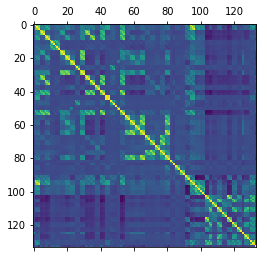

In [43]:
# heatmap

telecom_churn_high_value_cust_without_9_no_unique.corr()
plt.matshow(telecom_churn_high_value_cust_without_9_no_unique.corr())

### Finding the driver variables, using decision trees.

In [44]:
df = telecom_churn_high_value_cust_without_9_no_unique
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8    ...     \
7         52.29        453.43        567.16        325.91    ...      
8         35.08         94.66         80.63        136.48    ...      
21        85.14        757.93        896.68        983.39    ...      
23        33.58         85.41         89.36        205.89    ...      
33         0.00          0.00          0.00          0.00    ...      

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7             0   802       57.74       19.38       18.74         0.0   
8             0   315       21.03      910.65      122.16         0.0   
21            0   720        0.00        0.00        0.00         0.0   
23            1   604       40.45       51.86        0.00         0.0   
33            0  1328      358.10     2706.83     1714.67         0.0   

    total_data_topup_rech_amt_6  total_data_topup_rech_amt_7  \
7                        1580.0                        790.0   
8                         437.0                        955.0   
21                        600.0                        680.0   
23                          0.0                       1166.0   
33                       6343.0                      23230.0   

    avg_data_topup_rech_amt_6_7  churners  
7                        1185.0         1  
8                         696.0         0  
21                        640.0         0  
23                        583.0         0  
33                      14786.5         0  

[5 rows x 137 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Columns: 137 entries, mobile_number to churners
dtypes: datetime64[ns](3), float64(107), int32(1), int64(26)
memory usage: 29.5 MB


In [46]:
df.select_dtypes(include=['datetime64']).head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
7           2014-06-27          2014-07-25          2014-08-26
8           2014-06-25          2014-07-31          2014-08-30
21          2014-06-30          2014-07-31          2014-08-31
23          2014-06-18          2014-07-07          2014-08-24
33          2014-06-30          2014-07-30          2014-08-26

In [47]:
# Putting feature variable to X, dropping insignificant cols.

X = df.drop(['churners','mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)

X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         453.43        567.16        325.91          16.23   
8          94.66         80.63        136.48           0.00   
21        757.93        896.68        983.39           0.00   
23         85.41         89.36        205.89           0.00   
33          0.00          0.00          0.00           0.00   

               ...               sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              ...                         0            0   802       57.74   
8              ...                         0            0   315       21.03   
21             ...                         0            0   720        0.00   
23             ...                         0            1   604       40.45   
33             ...                         3            0  1328      358.10   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_topup_rech_amt_6  \
7        19.38       18.74         0.0                       1580.0   
8       910.65      122.16         0.0                        437.0   
21        0.00        0.00         0.0                        600.0   
23       51.86        0.00         0.0                          0.0   
33     2706.83     1714.67         0.0                       6343.0   

    total_data_topup_rech_amt_7  avg_data_topup_rech_amt_6_7  
7                         790.0                       1185.0  
8                         955.0                        696.0  
21                        680.0                        640.0  
23                       1166.0                        583.0  
33                      23230.0                      14786.5  

[5 rows x 132 columns]

In [48]:
# Putting response variable to y

y = df['churners']

y.head()

7     1
8     0
21    0
23    0
33    0
Name: churners, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 10
dt_default = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
dt_default.fit(X_traindf, y_traindf)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_testdf)

# Printing classification report
print(classification_report(y_testdf, y_pred_default))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94      7991
          1       0.26      0.63      0.37       458

avg / total       0.94      0.88      0.91      8449



In [52]:
# Printing confusion matrix and accuracy

print(confusion_matrix(y_testdf,y_pred_default))
print(accuracy_score(y_testdf,y_pred_default))

[[7184  807]
 [ 168  290]]
0.8846017280151497


In [53]:
# Importing required packages for visualization

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = X_traindf.columns[0:]
features

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'total_data_topup_rech_amt_6',
       'total_data_topup_rech_amt_7', 'avg_data_topup_rech_amt_6_7'],
      dtype='object', length=132)

In [54]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

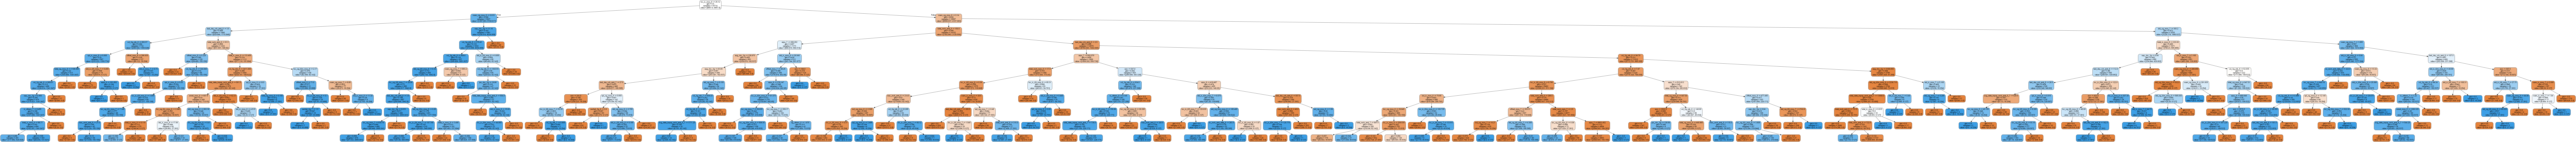

In [55]:
# plotting tree with max_depth=10
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Here, in this case study we'll be using Sensitivity or recall as evaluation metrics as finding the churners accurately is more important than finding the non-churners. Sen = TP/(TP + FN).

### Finding optimal parameters..

In [56]:
# GridSearchCV to find optimal max_depth
# using class_weight = 'balanced' as the churn rate is quite low.

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,
                              class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   n_jobs = -1)
tree.fit(X_traindf, y_traindf)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [57]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.579465      0.159405         0.020032        0.005665   
1       0.902186      0.067142         0.030254        0.011436   
2       1.505910      0.022127         0.025039        0.004905   
3       1.657341      0.170788         0.025240        0.010979   
4       2.141684      0.189692         0.022035        0.008662   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.560185           0.583333   
1               2  {'max_depth': 2}           0.699074           0.763889   
2               3  {'max_depth': 3}           0.689815           0.731481   
3               4  {'max_depth': 4}           0.666667           0.745370   
4               5  {'max_depth': 5}           0.726852           0.768519   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.592593           0.532407       ...                0.576850   
1           0.773148           0.763889       ...                0.766663   
2           0.787037           0.731481       ...                0.736111   
3           0.796296           0.759259       ...                0.749998   
4           0.796296           0.731481       ...                0.744447   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.028478               14            0.589120            0.564815   
1        0.042591                1            0.771991            0.775463   
2        0.030988                4            0.793981            0.776620   
3        0.045267                2            0.767361            0.788194   
4        0.034070                3            0.885417            0.840278   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.579861            0.596065            0.575231   
1            0.785880            0.789352            0.771991   
2            0.753472            0.759259            0.737269   
3            0.809028            0.817130            0.807870   
4            0.870370            0.843750            0.819444   

   mean_train_score  std_train_score  
0          0.581019         0.010857  
1          0.778935         0.007283  
2          0.764120         0.019524  
3          0.797917         0.017999  
4          0.851852         0.023321  

[5 rows x 21 columns]

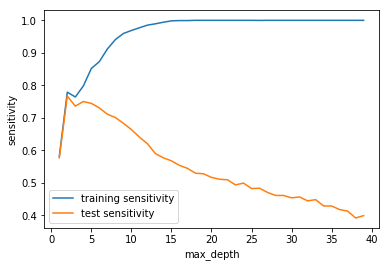

In [58]:
# plotting sensitivity with max_depth

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training sensitivity")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test sensitivity")
plt.xlabel("max_depth")
plt.ylabel("sensitivity")
plt.legend()
plt.show()


### max_depth near to 5 seems to be reasonable as it provides the good no. of driver variables along with high sensitivity on test data. 

In [59]:
# GridSearchCV to find optimal min_samples_leaf

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,
                              class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   n_jobs = -1)
tree.fit(X_traindf, y_traindf)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [60]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.627351      0.577928         0.019229        0.006624   
1       3.565262      0.140473         0.026640        0.012897   
2       3.875302      0.255481         0.019428        0.002336   
3       2.825412      0.227907         0.017826        0.002790   
4       2.590680      0.293833         0.025035        0.010657   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.500000   
1                     25  {'min_samples_leaf': 25}           0.652778   
2                     45  {'min_samples_leaf': 45}           0.675926   
3                     65  {'min_samples_leaf': 65}           0.722222   
4                     85  {'min_samples_leaf': 85}           0.731481   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.476852           0.541667           0.476852       ...          
1           0.694444           0.750000           0.675926       ...          
2           0.777778           0.777778           0.736111       ...          
3           0.782407           0.777778           0.745370       ...          
4           0.814815           0.777778           0.740741       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.501851        0.024428               10            1.000000   
1         0.687038        0.034472                9            0.967593   
2         0.744444        0.037658                8            0.936343   
3         0.756482        0.022029                7            0.912037   
4         0.761112        0.031208                6            0.907407   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.962963            0.969907            0.969907   
2            0.934028            0.951389            0.930556   
3            0.925926            0.915509            0.923611   
4            0.923611            0.893519            0.907407   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.973380          0.968750         0.003433  
2            0.930556          0.936574         0.007726  
3            0.936343          0.922685         0.008518  
4            0.935185          0.913426         0.014463  

[5 rows x 21 columns]

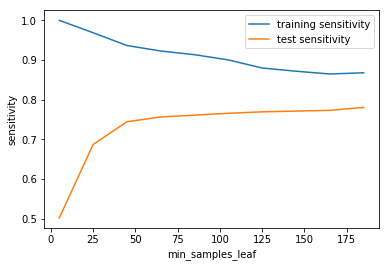

In [61]:
# plotting sensitivity with min_samples_leaf

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training sensitivity")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test sensitivity")
plt.xlabel("min_samples_leaf")
plt.ylabel("sensitivity")
plt.legend()
plt.show()


### min_samples_leaf = 125 - 150 is a good range to go with as after that sensitivity is not increasing much and seems to converge with training sensitivity.

In [62]:
# GridSearchCV to find optimal min_samples_split

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,
                              class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   n_jobs = -1)
tree.fit(X_traindf, y_traindf)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [63]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.992850      0.712048         0.022629        0.010346   
1       4.216572      0.132582         0.024236        0.009696   
2       7.072149      1.235200         0.074310        0.016740   
3       6.472196      1.014104         0.018227        0.004026   
4       4.678733      0.186358         0.019029        0.004056   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.314815   
1                      25  {'min_samples_split': 25}           0.407407   
2                      45  {'min_samples_split': 45}           0.481481   
3                      65  {'min_samples_split': 65}           0.541667   
4                      85  {'min_samples_split': 85}           0.569444   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.319444           0.310185           0.305556       ...          
1           0.393519           0.416667           0.361111       ...          
2           0.449074           0.509259           0.439815       ...          
3           0.541667           0.523148           0.509259       ...          
4           0.587963           0.583333           0.541667       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.317592        0.011187               10            1.000000   
1         0.404628        0.027404                9            0.997685   
2         0.466667        0.025426                8            0.989583   
3         0.524075        0.015604                7            0.987269   
4         0.568519        0.016667                6            0.967593   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.997685            0.998843            0.997685   
2            0.990741            0.993056            0.990741   
3            0.981481            0.993056            0.978009   
4            0.973380            0.976852            0.969907   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.998843          0.998148         0.000567  
2            0.994213          0.991667         0.001701  
3            0.979167          0.983796         0.005623  
4            0.971065          0.971759         0.003157  

[5 rows x 21 columns]

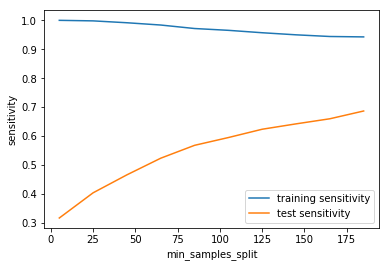

In [64]:
# plotting sensitivity with min_samples_split

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training sensitivity")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test sensitivity")
plt.xlabel("min_samples_split")
plt.ylabel("sensitivity")
plt.legend()
plt.show()


### min_samples_split = 150 to 175 looks good after that not much increase in test sensitivity.

In [65]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(100, 300, 50),
    'min_samples_split': range(100, 300, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_traindf,y_traindf)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(100, 300, 50), 'min_samples_split': range(100, 300, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [66]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.034966      0.243504         0.028042        0.013361   
1        2.602146      0.532768         0.022632        0.009471   
2        2.021105      0.054114         0.023434        0.011342   
3        2.088803      0.297294         0.018829        0.008220   
4        2.792215      0.268311         0.019831        0.007717   
5        2.747153      0.233507         0.024839        0.008070   
6        2.095218      0.204929         0.016424        0.002157   
7        1.975641      0.076692         0.016032        0.001902   
8        2.181535      0.027782         0.014623        0.001360   
9        2.063368      0.061002         0.018027        0.007248   
10       2.398853      0.171811         0.020644        0.006707   
11       2.466550      0.137657         0.028841        0.014978   
12       1.952008      0.051991         0.014423        0.001858   
13       1.875098      0.030899         0.018028        0.005770   
14       1.852664      0.014677         0.018428        0.005169   
15       2.212183      0.105856         0.020029        0.008210   
16       3.640038      0.281632         0.017825        0.005573   
17       2.994510      0.067463         0.015422        0.002944   
18       3.223436      0.124971         0.022833        0.010397   
19       3.190993      0.175892         0.016029        0.004053   
20       3.587968      0.308787         0.020622        0.006988   
21       2.865123      0.091586         0.020837        0.010290   
22       3.118488      0.345238         0.014220        0.001943   
23       4.547346      0.272071         0.027040        0.011899   
24       3.223839      0.310439         0.022033        0.009833   
25       3.340209      0.300995         0.017826        0.007612   
26       2.906398      0.276976         0.014406        0.001043   
27       3.330192      0.254869         0.020429        0.011858   
28       2.946038      0.175472         0.013820        0.000981   
29       2.738539      0.102264         0.013619        0.000489   
..            ...           ...              ...             ...   
34       1.438470      0.043222         0.015223        0.001473   
35       1.572263      0.070795         0.014021        0.001551   
36       1.620533      0.094437         0.013622        0.000801   
37       1.487942      0.027799         0.019627        0.011742   
38       1.844851      0.130625         0.014622        0.000802   
39       1.781766      0.033870         0.014619        0.001357   
40       1.633149      0.028874         0.015022        0.002284   
41       1.567656      0.053412         0.016826        0.005715   
42       1.433664      0.030935         0.014423        0.001202   
43       1.719877      0.100377         0.022833        0.009717   
44       2.018105      0.063695         0.019428        0.006508   
45       2.211381      0.140022         0.022033        0.013555   
46       1.827029      0.078665         0.026037        0.013225   
47       1.458899      0.058264         0.016826        0.003926   
48       2.158903      0.048245         0.014022        0.000633   
49       2.319339      0.159971         0.014421        0.001497   
50       2.444132      0.094583         0.017412        0.004478   
51       2.846899      0.123801         0.016023        0.002283   
52       2.273673      0.047711         0.016023        0.003527   
53       2.270468      0.074354         0.014022        0.000634   
54       2.146691      0.040207         0.013821        0.001168   
55       2.082399      0.012192         0.018227        0.008484   
56       2.589128      0.158002         0.017627        0.004416   
57       2.443116      0.332845         0.014020        0.001095   
58       2.154100      0.059290         0.014422        0.000800   
59       1.994871      0.029321         0.018427        0.008836   
60       2.051752      0.069462         0.013821        0.00

In [67]:
# printing the optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8298670995231815
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [68]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight='balanced',
                                  criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=150,
                                  min_samples_split=150)
clf_gini.fit(X_traindf, y_traindf)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
# Making predictions
y_pred_final = clf_gini.predict(X_testdf)

# Printing classification report
print(classification_report(y_testdf, y_pred_final))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      7991
          1       0.21      0.77      0.33       458

avg / total       0.94      0.83      0.87      8449



In [70]:
# Best sensitivity with optimal parameters.

# sensitivity
print("sensitivity:", metrics.recall_score(y_true=y_testdf, y_pred=y_pred_final), "\n")

sensitivity: 0.7685589519650655 



In [71]:
# confusion matrix
print(confusion_matrix(y_testdf, y_pred_final))

[[6650 1341]
 [ 106  352]]


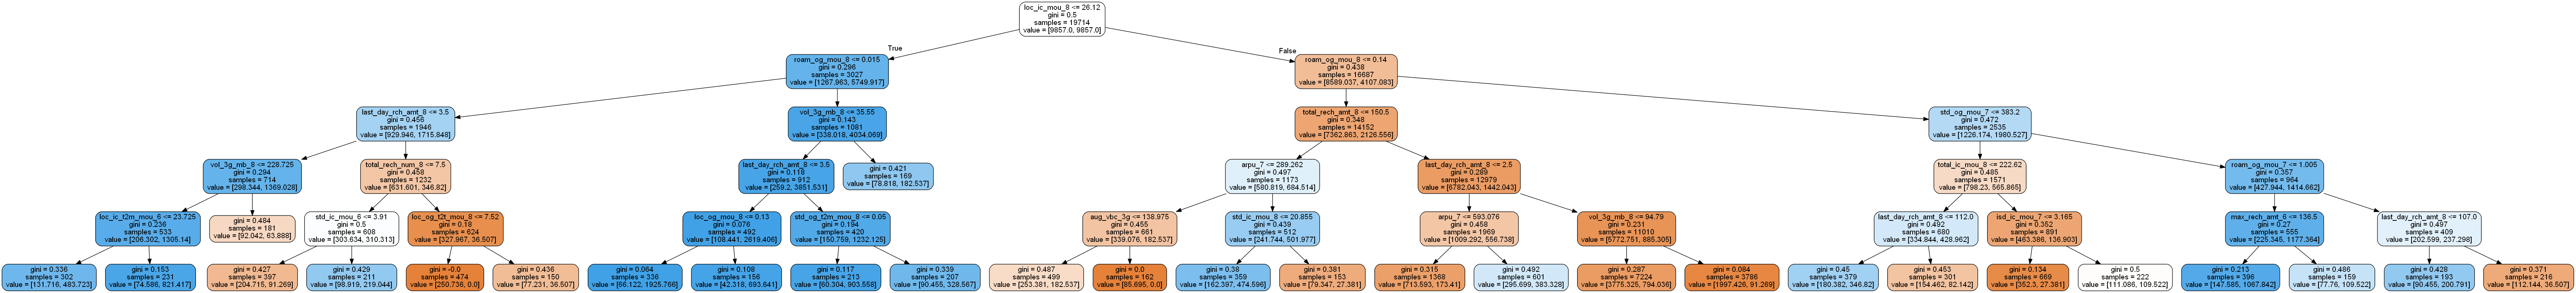

In [72]:
# plotting tree with max_depth=5
# final Decision tree with ~ .77 high sensitivity to interpret the driver variables.

dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
# plotting tree with max_depth=5

dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("final_churn.pdf")

True

### Important driver variables are - " loc_ic_mou_8, rom_og_mou_8, last_day_rc_amt_8, vol_3g_mb_8, loc_ic_t2m_6, total_rech_num_8, std_in_mou_8, loc_og_t2t_mou_8, std_og_mou_7, max_rech_amt_6 " and many more can be interpreted by looking at decision trees with level = 5. 
#### Plotting some of the driver variables to visualize how it's related to churn.

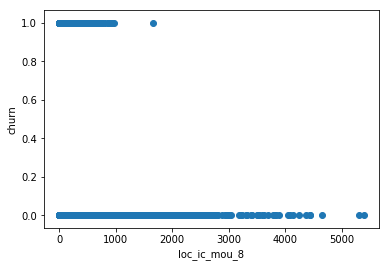

In [74]:
# plot loc_ic_mou_8 vs churn

plt.scatter(df['loc_ic_mou_8'], df['churners'])
plt.xlabel('loc_ic_mou_8')
plt.ylabel('churn')
plt.show() 

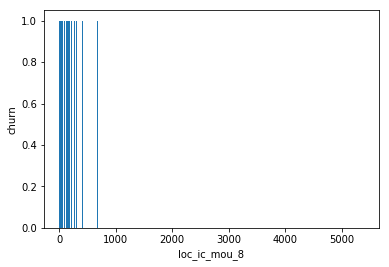

In [75]:
plt.bar(df['loc_ic_mou_8'], df['churners']) 
plt.xlabel("loc_ic_mou_8") 
plt.ylabel("churn") 
plt.show() 

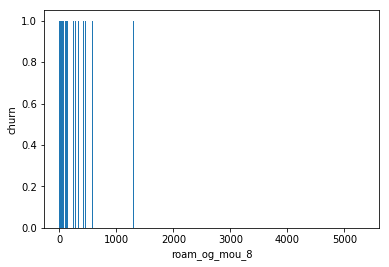

In [76]:
# plot roam_og_mou_8 vs churn.

plt.bar(df['roam_og_mou_8'], df['churners']) 
plt.xlabel("roam_og_mou_8") 
plt.ylabel("churn") 
plt.show() 

#### Mostly for all the driver varibles, the values dropped at the action phase and that turned to be the reason behing churn, as we can see from above plots customers with local incoming and roaming og from 0 to very less , churned. 

## Recommendations - 
#### The action plan from the driver variables can be interpreted that when in the action phase the values of driver variables drops the operator must roll out offers on that particular variables to force them to stay back. eg- providing cashbacks on certain topups, providing free data for a month or so, these plans will definitely help in retaining the customers about to churn.

### Finding a model for improving sensitivity to predict better, here we are reducing dimensions with the help of PCA, and then creating various models and finding the best one of them.

### Using PCA

In [77]:
telecom_churn_high_value_cust_without_9 = telecom_churn_high_value_cust[cols]

In [78]:
# removing unnecessary columns

telecom_churn_high_value_cust_without_9_no_unique_PCA = telecom_churn_high_value_cust_without_9_no_unique[telecom_churn_high_value_cust_without_9_no_unique.columns.difference(["mobile_number", "date_of_last_rech_6", "date_of_last_rech_7","date_of_last_rech_8" , "churners"])]

In [79]:
X = telecom_churn_high_value_cust_without_9_no_unique_PCA

In [80]:
X.shape

(28163, 132)

In [81]:
Y = telecom_churn_high_value_cust_without_9_no_unique[['churners']]

In [82]:
#Using function to standardize the data, since all variables are not in the same units

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
len(X.columns)

132

In [84]:
X_scaled_df = X[X.columns]

In [85]:
X_scaled_df[X.columns] = scaler.fit_transform(X[X.columns])

In [86]:
X_scaled_df.head()

aon    arpu_6    arpu_7    arpu_8  aug_vbc_3g  av_rech_amt_data_6  \
7  -0.448053  1.130457  1.619742  5.280004   -0.273203           -0.660873   
8  -0.953787 -0.406964 -0.168046 -0.782524   -0.359658           -0.660873   
21 -0.533208 -0.104734  0.051940  0.217330   -0.409186           -0.660873   
23 -0.653670 -1.084696 -0.789928 -0.323748   -0.313922           -0.660873   
33  0.098180  0.925247  3.731381 -0.239300    0.434170            4.855798   

    av_rech_amt_data_7  avg_data_topup_rech_amt_6_7  ic_others_6  ic_others_7  \
7            -0.685524                     0.020015     1.017571     0.828443   
8             0.193599                    -0.336868    -0.082439    -0.095009   
21           -0.685524                    -0.377738    -0.082439    -0.095009   
23            1.082656                    -0.419338    -0.082439     0.230235   
33           11.994716                     9.946684     0.003521    -0.055494   

       ...       total_rech_data_7  total_rech_num_6  total_rech_num_7  \
7      ...               -0.604688         -0.753410         -0.744369   
8      ...                0.039198          0.750047          0.948023   
21     ...               -0.604688          1.072216          1.476896   
23     ...                0.039198         -0.968190         -0.744369   
33     ...                1.970857         -0.538631          0.207602   

    total_rech_num_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
7          -0.369873    -0.383374    -0.380563    -0.345594    -0.391026   
8           0.383801    -0.383374     0.679584    -0.345500    -0.391026   
21          1.783480    -0.383374    -0.380563    -0.345594    -0.391026   
23         -0.692876    -0.383374    -0.379134    -0.345563    -0.391026   
33         -1.015879    -0.121915    -0.208557    -0.320516     3.789499   

    vol_3g_mb_7  vol_3g_mb_8  
7     -0.409670    -0.393949  
8      0.441887    -0.380480  
21    -0.409670    -0.393949  
23     0.269682     0.745359  
33     8.837480     8.293693  

[5 rows x 132 columns]

### Reducing Dimensionality with PCA

In [87]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [88]:
pca.fit(X_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [89]:
pca.components_

array([[ 3.10843726e-02,  1.74741274e-01,  1.79025273e-01, ...,
        -2.16685086e-02, -2.17030154e-02, -1.39561627e-02],
       [-7.75147911e-02,  5.08609246e-03,  1.37121319e-02, ...,
        -1.13425284e-01, -1.16562120e-01, -1.10934492e-01],
       [-3.85030627e-02,  1.44139806e-01,  1.63806381e-01, ...,
         2.01626330e-01,  2.15572607e-01,  1.98107731e-01],
       ...,
       [-5.25141530e-16,  1.28467905e-16, -3.32077782e-16, ...,
         1.40776876e-17, -3.04022148e-16,  3.40991748e-16],
       [-0.00000000e+00, -3.71447664e-16,  3.62400223e-16, ...,
        -3.05745013e-17, -2.33970829e-16,  4.97431957e-16],
       [-0.00000000e+00,  6.84673672e-17, -8.17237582e-16, ...,
         3.40710533e-16,  3.64806926e-16, -2.24971951e-16]])

In [90]:
# Analysing the V-t matrix.
colnames = X_scaled_df.columns
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2     Feature
0  0.031084 -0.077515         aon
1  0.174741  0.005086      arpu_6
2  0.179025  0.013712      arpu_7
3  0.174648  0.000475      arpu_8
4 -0.010715 -0.110695  aug_vbc_3g

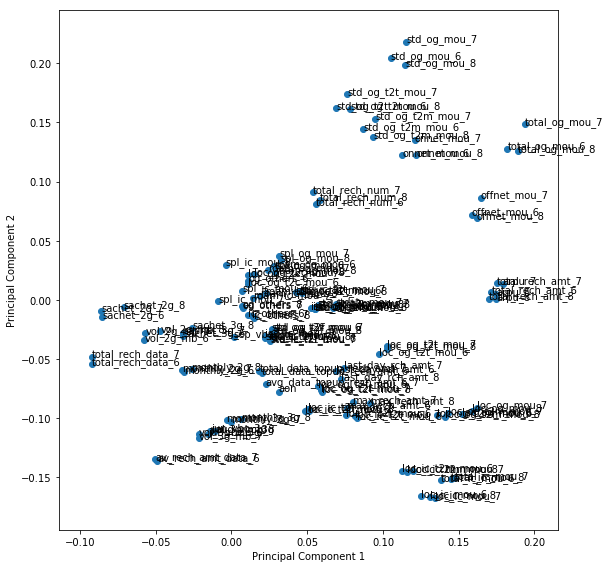

In [91]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [92]:
pca.explained_variance_ratio_

array([1.08512419e-01, 8.54439044e-02, 6.51605375e-02, 4.65114651e-02,
       4.43694852e-02, 3.56374154e-02, 3.07314216e-02, 2.72095992e-02,
       2.56602565e-02, 2.39493288e-02, 2.21282085e-02, 2.12215374e-02,
       2.10239188e-02, 2.00174076e-02, 1.88897704e-02, 1.84572264e-02,
       1.59628901e-02, 1.48473932e-02, 1.45898534e-02, 1.42595972e-02,
       1.35066739e-02, 1.20125192e-02, 1.18706146e-02, 1.08335333e-02,
       1.05562540e-02, 1.03277892e-02, 9.78790269e-03, 8.89857373e-03,
       8.69650022e-03, 7.96572695e-03, 7.87274255e-03, 7.66306906e-03,
       7.23790296e-03, 7.04366077e-03, 6.97132918e-03, 6.37852138e-03,
       6.29554073e-03, 6.16544210e-03, 6.10360318e-03, 5.89849542e-03,
       5.76024410e-03, 5.47876320e-03, 5.41706447e-03, 5.03879647e-03,
       4.95017729e-03, 4.79615957e-03, 4.77442963e-03, 4.50566985e-03,
       4.34742692e-03, 4.28938453e-03, 3.70027326e-03, 3.69558774e-03,
       3.60122612e-03, 3.56221917e-03, 3.39114773e-03, 3.35830999e-03,
      

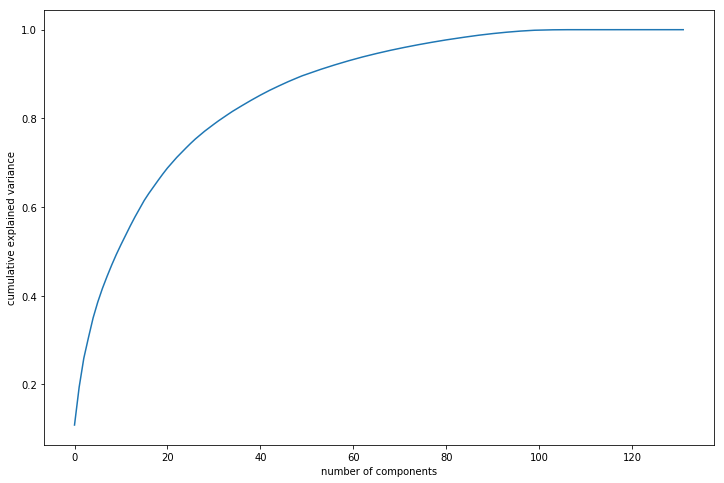

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### We found that with 60 variable/components we can explain 90%+ variance.

In [94]:
# Using PCA with 60 variables only for efficiency - saves a lot of time on larger datasets.

from sklearn.decomposition import PCA
pca_final = PCA(n_components=60)
X_pca = pca_final.fit_transform(X_scaled_df)

In [95]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.head()

0         1          2         3         4         5         6   \
0  6.357001 -4.274506   2.069020 -6.815727 -0.494616  2.267046  3.695224   
1 -2.545182  1.085076  -0.506180  0.528616 -0.734229 -0.720050  0.268373   
2  0.808734  3.699672  -0.553321  0.153109  0.832936  2.150355 -1.885037   
3 -2.658965 -0.808512  -0.453861 -0.935660 -0.233554 -0.669728 -0.803101   
4 -2.172247 -9.899238  21.850563  1.000446 -0.802975 -4.494612 -4.898618   

         7         8         9     ...           50        51        52  \
0 -2.043469  4.156247 -1.812918    ...    -0.606972 -0.133599 -1.825915   
1 -0.491855 -0.532655  1.077103    ...    -1.664235  0.238057 -0.506798   
2  0.286148 -0.533507  0.619329    ...    -0.104249  0.111800  0.334790   
3  0.435172 -0.429723  0.508407    ...     0.361641 -0.167244  0.242253   
4  0.495252 -0.012043 -0.361393    ...     0.830749 -0.098477 -1.219047   

         53        54        55        56        57        58        59  
0  2.870559 -1.457126 -0.240894 -3.686132  0.559553 -0.148581  0.052555  
1 -0.014321  0.118758 -0.622367 -0.019617 -0.630479  0.261033 -0.170608  
2  0.078596  0.042709 -0.021699  0.105470  0.068127  0.026151  0.180577  
3  0.159939  0.113797 -0.074461 -0.129488 -0.523123  0.124933 -0.023435  
4  3.224036  1.643941 -0.966284  0.602897  1.361691  0.639185  0.405054  

[5 rows x 60 columns]

In [96]:
Y.head()

churners
7          1
8          0
21         0
23         0
33         0

In [97]:
Y = Y.reset_index(drop=True)

### Joining Churners column back

In [98]:
telecome_churn_pca_df = pd.concat([Y['churners'], X_pca_df],axis=1)
telecome_churn_pca_df.head(13)

churners         0         1          2         3         4         5  \
0          1  6.357001 -4.274506   2.069020 -6.815727 -0.494616  2.267046   
1          0 -2.545182  1.085076  -0.506180  0.528616 -0.734229 -0.720050   
2          0  0.808734  3.699672  -0.553321  0.153109  0.832936  2.150355   
3          0 -2.658965 -0.808512  -0.453861 -0.935660 -0.233554 -0.669728   
4          0 -2.172247 -9.899238  21.850563  1.000446 -0.802975 -4.494612   
5          0 -1.575160  3.177602  -0.837989 -0.340988 -0.378616 -1.185484   
6          0 -0.847452 -0.855811  -1.957386 -2.748386 -0.566125  0.646154   
7          0  5.548185  0.263839  -1.935282  0.992492 -1.375450 -2.564303   
8          0  2.765894 -1.954060   0.527309  2.269998  1.249485  3.412458   
9          0 -4.066834 -1.477475   2.404716  4.165342  0.797677  0.830891   
10         0  0.373677 -8.513090  10.383847 -2.541376 -0.953313 -3.628968   
11         0  1.394055 -4.803894  -3.631650  1.302336  0.756042 -0.510814   
12         1 -3.364408 -2.031143   2.495512 -3.198196 -1.046617 -1.391637   

           6         7         8    ...           50        51        52  \
0   3.695224 -2.043469  4.156247    ...    -0.606972 -0.133599 -1.825915   
1   0.268373 -0.491855 -0.532655    ...    -1.664235  0.238057 -0.506798   
2  -1.885037  0.286148 -0.533507    ...    -0.104249  0.111800  0.334790   
3  -0.803101  0.435172 -0.429723    ...     0.361641 -0.167244  0.242253   
4  -4.898618  0.495252 -0.012043    ...     0.830749 -0.098477 -1.219047   
5   0.842717  0.706706  0.203566    ...    -0.083471 -0.276526  0.110529   
6   1.543520 -1.489809  2.738189    ...     0.185143  0.155066 -0.108826   
7   1.029484  0.912068 -0.131732    ...    -0.102137 -0.523299  0.001984   
8   5.246746  3.016995 -1.375490    ...    -0.314015 -0.470768  0.411324   
9   0.523731 -0.696679  0.171547    ...     1.485395 -0.770365  1.131552   
10 -4.313015  1.565131  0.837111    ...     0.028976  0.030564 -0.273177   
11  0.508227  3.172255  1.219340    ...    -0.125631 -0.004812  0.351879   
12 -0.959023  0.814292 -0.047405    ...     0.106063 -0.982871 -0.178098   

          53        54        55        56        57        58        59  
0   2.870559 -1.457126 -0.240894 -3.686132  0.559553 -0.148581  0.052555  
1  -0.014321  0.118758 -0.622367 -0.019617 -0.630479  0.261033 -0.170608  
2   0.078596  0.042709 -0.021699  0.105470  0.068127  0.026151  0.180577  
3   0.159939  0.113797 -0.074461 -0.129488 -0.523123  0.124933 -0.023435  
4   3.224036  1.643941 -0.966284  0.602897  1.361691  0.639185  0.405054  
5  -0.072552  0.060294 -0.157062  0.248979  0.364154  0.058048  0.033770  
6  -0.125822  0.074835 -0.263502  0.636537  0.179712 -0.051489 -0.122047  
7  -0.071023 -0.000834  0.190625  0.438954 -0.506488  0.188364  0.519033  
8  -0.168022  0.002219  0.129659 -0.431547  0.622670 -0.089892 -0.763821  
9  -0.405106 -2.499408  0.489942  0.166473 -2.150482  0.094649 -0.226508  
10  0.990872  0.641552 -0.120759  1.532995  0.883349  0.503451  0.019556  
11 -0.310457  0.155319 -0.048053 -0.321826 -0.025405 -0.153444  0.176184  
12  1.539022  0.130376  0.900358  0.725680 -0.426252  0.025851 -0.046427  

[13 rows x 61 columns]

In [99]:
telecome_churn_pca_df.shape

(28163, 61)

In [100]:
telecome_churn_pca_df.columns

Index(['churners',          0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,         12,         13,         14,         15,         16,
               17,         18,         19,         20,         21,         22,
               23,         24,         25,         26,         27,         28,
               29,         30,         31,         32,         33,         34,
               35,         36,         37,         38,         39,         40,
               41,         42,         43,         44,         45,         46,
               47,         48,         49,         50,         51,         52,
               53,         54,         55,         56,         57,         58,
               59],
      dtype='object')

In [101]:
### Checking the Churn Rate
churn = (sum(telecome_churn_pca_df['churners'])/len(telecome_churn_pca_df['churners'].index))*100
churn

5.461065937577673

In [102]:
# splitting into X and y

X = telecome_churn_pca_df.drop("churners", axis = 1)
y = telecome_churn_pca_df['churners']

In [103]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
# svm with rbf kernel.

model_linear = SVC(kernel='rbf', class_weight="balanced")
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [105]:
# confusion matrix and sensitivity

# sensitivity
print("sensitivity:", metrics.recall_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

sensitivity: 0.6474654377880185 

[[7189  826]
 [ 153  281]]


In [106]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94      8015
          1       0.25      0.65      0.36       434

avg / total       0.94      0.88      0.91      8449



### Now, performing Logistic regression, checking correlations if any between PC's.

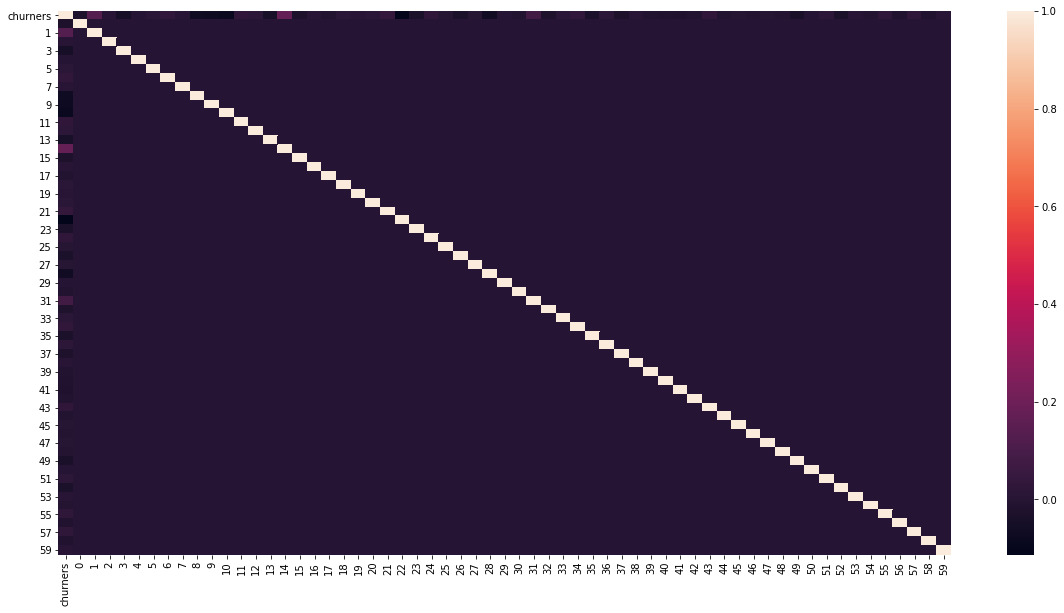

In [107]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecome_churn_pca_df.corr())
plt.show()

### No correlation as added advantage of PCA.

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [109]:
logm1 = logreg.fit(X_train, y_train)

In [110]:
predictions = logreg.predict(X_test)

In [111]:
predictions[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [112]:
# confusion matrix and sensitivity

# sensitivity
print("sensitivity:", metrics.recall_score(y_true=y_test, y_pred=predictions), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

sensitivity: 0.7949308755760369 

[[6367 1648]
 [  89  345]]


In [113]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.79      0.88      8015
          1       0.17      0.79      0.28       434

avg / total       0.94      0.79      0.85      8449



### Random forest model

In [114]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [115]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [116]:
# Making predictions
predictions = rfc.predict(X_test)

In [117]:
# confusion matrix and sensitivity

# sensitivity
print("sensitivity:", metrics.recall_score(y_true=y_test, y_pred=predictions), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

sensitivity: 0.04838709677419355 

[[7995   20]
 [ 413   21]]


In [118]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [119]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      8015
          1       0.51      0.05      0.09       434

avg / total       0.93      0.95      0.93      8449



In [120]:
# Tuning hyperparameters...
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [121]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 18.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [122]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8848026782996855 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [123]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300,
                            class_weight='balanced')

In [124]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [125]:
# predict
predictions = rfc.predict(X_test)

In [126]:
# confusion matrix and sensitivity

# sensitivity
print("sensitivity:", metrics.recall_score(y_true=y_test, y_pred=predictions), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

sensitivity: 0.6658986175115207 

[[7223  792]
 [ 145  289]]


### Out of all the above 3 models LS performs with best for the predictions with sensitivity score of around .8 with is par higher than SVM and random forests. So, the best model comes up on PCA treated data with LR for predictions.